#### Spaceship Titanic

#### Our goal: Predict which passengers are transported to an alternate dimension

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [3]:
X_test = pd.read_csv('test.csv')
X_test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [4]:
train.drop(['Spa', 'VRDeck'], axis=1, inplace = True)
X_test.drop(['Spa', 'VRDeck'], axis=1, inplace = True)

### Data Exploration

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Name          8493 non-null   object 
 11  Transported   8693 non-null   bool   
dtypes: bool(1), float64(4), object(7)
memory usage: 755.7+ KB


In [6]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Name          4183 non-null   object 
dtypes: float64(4), object(7)
memory usage: 367.7+ KB


In [7]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall
count,8514.000000,8512.000000,8510.000000,8485.000000
mean,28.827930,224.687617,458.077203,173.729169
std,14.489021,666.717663,1611.489240,604.696458
min,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000
max,79.000000,14327.000000,29813.000000,23492.000000


In [8]:
X_test.describe()

,Age,RoomService,FoodCourt,ShoppingMall
count,4186.000000,4195.000000,4171.000000,4179.000000
mean,28.658146,219.266269,439.484296,177.295525
std,14.179072,607.011289,1527.663045,560.821123
min,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000
max,79.000000,11567.000000,25273.000000,8292.000000


### Data Cleaning

#### HomePlanet

In [9]:
train['HomePlanet'].fillna("Undefined" ,inplace = True)
X_test['HomePlanet'].fillna("Undefined" ,inplace = True)
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,Celeon Hontichre,False


#### CryoSleep

In [10]:
train[train["CryoSleep"].isna() == True]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Name,Transported
92,0099_02,Earth,NaN,G/12/P,TRAPPIST-1e,2.0,False,0.0,0.0,0.0,Thewis Connelson,True
98,0105_01,Earth,NaN,F/21/P,TRAPPIST-1e,27.0,False,0.0,0.0,570.0,Carry Cleachrand,False
104,0110_02,Europa,NaN,B/5/P,TRAPPIST-1e,40.0,False,0.0,331.0,0.0,Aldeba Bootious,False
111,0115_01,Mars,NaN,F/24/P,TRAPPIST-1e,26.0,False,0.0,0.0,0.0,Rohs Pead,True
152,0173_01,Earth,NaN,E/11/S,TRAPPIST-1e,58.0,False,0.0,985.0,0.0,Hilip Grifford,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8620,9197_01,Europa,NaN,C/308/P,55 Cancri e,44.0,False,0.0,0.0,0.0,Bellus Platch,True
8651,9227_05,Earth,NaN,G/1498/P,TRAPPIST-1e,8.0,False,0.0,0.0,0.0,Hard Hinglendez,False
8664,9246_01,Earth,NaN,G/1490/S,TRAPPIST-1e,32.0,False,0.0,0.0,0.0,NaN,True
8675,9259_01,Earth,NaN,F/1893/P,TRAPPIST-1e,44.0,False,1030.0,1015.0,0.0,Annah Gilleyons,True


In [11]:
train['CryoSleep'].fillna(False ,inplace = True)

train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,Celeon Hontichre,False


In [12]:
X_test['CryoSleep'].fillna(False ,inplace = True)
X_test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,Kitakan Conale


In [13]:
train['CryoSleep'].value_counts()

False    5656
True     3037
Name: CryoSleep, dtype: int64

In [14]:
X_test['CryoSleep'].value_counts()

False    2733
True     1544
Name: CryoSleep, dtype: int64

#### Cabin

In [15]:
train[train["Cabin"].isna() == True]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Name,Transported
15,0012_01,Earth,False,NaN,TRAPPIST-1e,31.0,False,32.0,0.0,876.0,Justie Pooles,False
93,0101_01,Mars,True,NaN,TRAPPIST-1e,31.0,False,0.0,0.0,0.0,Book Trad,True
103,0110_01,Europa,False,NaN,TRAPPIST-1e,32.0,False,0.0,410.0,6.0,Graviph Aloubtled,False
222,0239_01,Mars,False,NaN,TRAPPIST-1e,37.0,False,637.0,0.0,0.0,Diedow Resty,False
227,0244_01,Mars,True,NaN,TRAPPIST-1e,43.0,False,0.0,0.0,0.0,Froos Sad,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8209,8772_02,Europa,False,NaN,55 Cancri e,53.0,False,0.0,1127.0,0.0,Naosura Motled,False
8475,9057_01,Europa,False,NaN,55 Cancri e,36.0,True,132.0,3479.0,0.0,Coxan Statch,False
8485,9069_03,Europa,True,NaN,55 Cancri e,25.0,False,0.0,0.0,0.0,Bath Brakeng,True
8509,9081_03,Earth,True,NaN,TRAPPIST-1e,1.0,False,0.0,0.0,0.0,Beula Clemondsey,False


In [16]:
train["Cabin"].fillna("X/2000/X" ,inplace = True)
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,Celeon Hontichre,False


In [17]:
X_test["Cabin"].fillna("X/2000/X" ,inplace = True)
X_test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,X/2000/X,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,Kitakan Conale


#### Destination

In [18]:
train["Destination"].fillna("TRAPPIST-1e" ,inplace = True)
X_test["Destination"].fillna("TRAPPIST-1e" ,inplace = True)

### Age

In [19]:

train["Age"].fillna(29.0 ,inplace = True)
X_test["Age"].fillna(29.0 ,inplace = True)

In [20]:
X_test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,X/2000/X,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,29.0,False,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,TRAPPIST-1e,29.0,False,0.0,2680.0,0.0,Kitakan Conale


#### VIP

In [21]:
train["VIP"].fillna(False ,inplace = True)
X_test["VIP"].fillna(False ,inplace = True)

#### RoomService

In [22]:

train["RoomService"].fillna(0.0 ,inplace = True)
X_test["RoomService"].fillna(0.0 ,inplace = True)

#### FoodCourt

In [23]:

train["FoodCourt"].fillna(0.0 ,inplace = True)
X_test["FoodCourt"].fillna(0.0 ,inplace = True)

#### ShoppingMall

In [24]:

train["ShoppingMall"].fillna(0.0 ,inplace = True)
X_test["ShoppingMall"].fillna(0.0 ,inplace = True)

### Feature Engineering

In [25]:
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,Celeon Hontichre,False


In [26]:
train['Group of Passenger'] = train['PassengerId'].apply(lambda x: x.split('_')[0]).astype('int64')
train['Number within Group'] = train['PassengerId'].apply(lambda x: x.split('_')[1]).astype('int64')
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Name,Transported,Group of Passenger,Number within Group
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,Maham Ofracculy,False,1,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,Juanna Vines,True,2,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,Altark Susent,False,3,1
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,Solam Susent,False,3,2
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,Willy Santantines,True,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,Gravior Noxnuther,False,9276,1
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,Kurta Mondalley,False,9278,1
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,Fayey Connon,True,9279,1
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,Celeon Hontichre,False,9280,1


In [27]:
X_test['Group of Passenger'] = X_test['PassengerId'].apply(lambda x: x.split('_')[0]).astype('int64')
X_test['Number within Group'] = X_test['PassengerId'].apply(lambda x: x.split('_')[1]).astype('int64')
X_test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Name,Group of Passenger,Number within Group
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,Nelly Carsoning,13,1
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,Lerome Peckers,18,1
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,Sabih Unhearfus,19,1
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,Meratz Caltilter,21,1
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,Brence Harperez,23,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,Jeron Peter,9266,2
4273,9269_01,Earth,False,X/2000/X,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,Matty Scheron,9269,1
4274,9271_01,Mars,True,D/296/P,55 Cancri e,29.0,False,0.0,0.0,0.0,Jayrin Pore,9271,1
4275,9273_01,Europa,False,D/297/P,TRAPPIST-1e,29.0,False,0.0,2680.0,0.0,Kitakan Conale,9273,1


In [28]:
train.drop(['PassengerId'], axis=1, inplace = True)
X_test.drop(['PassengerId'], axis=1, inplace = True)
train

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Name,Transported,Group of Passenger,Number within Group
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,Maham Ofracculy,False,1,1
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,Juanna Vines,True,2,1
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,Altark Susent,False,3,1
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,Solam Susent,False,3,2
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,Willy Santantines,True,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,Gravior Noxnuther,False,9276,1
8689,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,Kurta Mondalley,False,9278,1
8690,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,Fayey Connon,True,9279,1
8691,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,Celeon Hontichre,False,9280,1


In [29]:
train['Transported'].replace({True: 1, False: 0},inplace = True)
train

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Name,Transported,Group of Passenger,Number within Group
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,Maham Ofracculy,0,1,1
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,Juanna Vines,1,2,1
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,Altark Susent,0,3,1
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,Solam Susent,0,3,2
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,Willy Santantines,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,Gravior Noxnuther,0,9276,1
8689,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,Kurta Mondalley,0,9278,1
8690,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,Fayey Connon,1,9279,1
8691,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,Celeon Hontichre,0,9280,1


In [30]:
X_test

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Name,Group of Passenger,Number within Group
0,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,Nelly Carsoning,13,1
1,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,Lerome Peckers,18,1
2,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,Sabih Unhearfus,19,1
3,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,Meratz Caltilter,21,1
4,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,Brence Harperez,23,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4272,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,Jeron Peter,9266,2
4273,Earth,False,X/2000/X,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,Matty Scheron,9269,1
4274,Mars,True,D/296/P,55 Cancri e,29.0,False,0.0,0.0,0.0,Jayrin Pore,9271,1
4275,Europa,False,D/297/P,TRAPPIST-1e,29.0,False,0.0,2680.0,0.0,Kitakan Conale,9273,1


In [31]:
train

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Name,Transported,Group of Passenger,Number within Group
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,Maham Ofracculy,0,1,1
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,Juanna Vines,1,2,1
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,Altark Susent,0,3,1
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,Solam Susent,0,3,2
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,Willy Santantines,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,Gravior Noxnuther,0,9276,1
8689,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,Kurta Mondalley,0,9278,1
8690,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,Fayey Connon,1,9279,1
8691,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,Celeon Hontichre,0,9280,1


In [32]:
train['Cabin'].value_counts()

X/2000/X    199
G/734/S       8
C/137/S       7
B/201/P       7
G/109/P       7
           ... 
G/556/P       1
E/231/S       1
G/545/S       1
G/543/S       1
C/178/S       1
Name: Cabin, Length: 6561, dtype: int64

In [33]:
train['Deck'] = train['Cabin'].apply(lambda x: x.split('/')[0])
train['Number'] = train['Cabin'].apply(lambda x: x.split('/')[1]).astype('int64')
train['Side'] = train['Cabin'].apply(lambda x: x.split('/')[2])
train

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Name,Transported,Group of Passenger,Number within Group,Deck,Number,Side
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,Maham Ofracculy,0,1,1,B,0,P
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,Juanna Vines,1,2,1,F,0,S
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,Altark Susent,0,3,1,A,0,S
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,Solam Susent,0,3,2,A,0,S
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,Willy Santantines,1,4,1,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,Gravior Noxnuther,0,9276,1,A,98,P
8689,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,Kurta Mondalley,0,9278,1,G,1499,S
8690,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,Fayey Connon,1,9279,1,G,1500,S
8691,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,Celeon Hontichre,0,9280,1,E,608,S


In [34]:
X_test['Deck'] = X_test['Cabin'].apply(lambda x: x.split('/')[0])
X_test['Number'] = X_test['Cabin'].apply(lambda x: x.split('/')[1]).astype('int64')
X_test['Side'] = X_test['Cabin'].apply(lambda x: x.split('/')[2])
X_test

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Name,Group of Passenger,Number within Group,Deck,Number,Side
0,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,Nelly Carsoning,13,1,G,3,S
1,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,Lerome Peckers,18,1,F,4,S
2,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,Sabih Unhearfus,19,1,C,0,S
3,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,Meratz Caltilter,21,1,C,1,S
4,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,Brence Harperez,23,1,F,5,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,Jeron Peter,9266,2,G,1496,S
4273,Earth,False,X/2000/X,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,Matty Scheron,9269,1,X,2000,X
4274,Mars,True,D/296/P,55 Cancri e,29.0,False,0.0,0.0,0.0,Jayrin Pore,9271,1,D,296,P
4275,Europa,False,D/297/P,TRAPPIST-1e,29.0,False,0.0,2680.0,0.0,Kitakan Conale,9273,1,D,297,P


In [35]:
train.drop(['Cabin'], axis=1, inplace = True)
X_test.drop(['Cabin'], axis=1, inplace = True)
train

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Name,Transported,Group of Passenger,Number within Group,Deck,Number,Side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,Maham Ofracculy,0,1,1,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,Juanna Vines,1,2,1,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,Altark Susent,0,3,1,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,Solam Susent,0,3,2,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,Willy Santantines,1,4,1,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,Gravior Noxnuther,0,9276,1,A,98,P
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,Kurta Mondalley,0,9278,1,G,1499,S
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,Fayey Connon,1,9279,1,G,1500,S
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,Celeon Hontichre,0,9280,1,E,608,S


In [36]:
train['CryoSleep'].replace({True: 1, False: 0},inplace = True)
X_test['CryoSleep'].replace({True: 1, False: 0},inplace = True)
train

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Name,Transported,Group of Passenger,Number within Group,Deck,Number,Side
0,Europa,0,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,Maham Ofracculy,0,1,1,B,0,P
1,Earth,0,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,Juanna Vines,1,2,1,F,0,S
2,Europa,0,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,Altark Susent,0,3,1,A,0,S
3,Europa,0,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,Solam Susent,0,3,2,A,0,S
4,Earth,0,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,Willy Santantines,1,4,1,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,0,55 Cancri e,41.0,True,0.0,6819.0,0.0,Gravior Noxnuther,0,9276,1,A,98,P
8689,Earth,1,PSO J318.5-22,18.0,False,0.0,0.0,0.0,Kurta Mondalley,0,9278,1,G,1499,S
8690,Earth,0,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,Fayey Connon,1,9279,1,G,1500,S
8691,Europa,0,55 Cancri e,32.0,False,0.0,1049.0,0.0,Celeon Hontichre,0,9280,1,E,608,S


In [37]:

train['Destination'].value_counts()

TRAPPIST-1e      6097
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [38]:
train['VIP'].replace({True: 1, False: 0},inplace = True)
X_test['VIP'].replace({True: 1, False: 0},inplace = True)
train

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Name,Transported,Group of Passenger,Number within Group,Deck,Number,Side
0,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,Maham Ofracculy,0,1,1,B,0,P
1,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,Juanna Vines,1,2,1,F,0,S
2,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,Altark Susent,0,3,1,A,0,S
3,Europa,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,Solam Susent,0,3,2,A,0,S
4,Earth,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,Willy Santantines,1,4,1,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,0,55 Cancri e,41.0,1,0.0,6819.0,0.0,Gravior Noxnuther,0,9276,1,A,98,P
8689,Earth,1,PSO J318.5-22,18.0,0,0.0,0.0,0.0,Kurta Mondalley,0,9278,1,G,1499,S
8690,Earth,0,TRAPPIST-1e,26.0,0,0.0,0.0,1872.0,Fayey Connon,1,9279,1,G,1500,S
8691,Europa,0,55 Cancri e,32.0,0,0.0,1049.0,0.0,Celeon Hontichre,0,9280,1,E,608,S


In [39]:
train['Name'].value_counts()

Gollux Reedall        2
Elaney Webstephrey    2
Grake Porki           2
Sus Coolez            2
Apix Wala             2
                     ..
Jamela Griffy         1
Hardy Griffy          1
Salley Mckinn         1
Mall Frasp            1
Propsh Hontichre      1
Name: Name, Length: 8473, dtype: int64

In [40]:
train.drop(['Name'], axis=1, inplace = True)
X_test.drop(['Name'], axis=1, inplace = True)
train

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Transported,Group of Passenger,Number within Group,Deck,Number,Side
0,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0,1,1,B,0,P
1,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,1,2,1,F,0,S
2,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,0,3,1,A,0,S
3,Europa,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,0,3,2,A,0,S
4,Earth,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,1,4,1,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,0,55 Cancri e,41.0,1,0.0,6819.0,0.0,0,9276,1,A,98,P
8689,Earth,1,PSO J318.5-22,18.0,0,0.0,0.0,0.0,0,9278,1,G,1499,S
8690,Earth,0,TRAPPIST-1e,26.0,0,0.0,0.0,1872.0,1,9279,1,G,1500,S
8691,Europa,0,55 Cancri e,32.0,0,0.0,1049.0,0.0,0,9280,1,E,608,S


In [41]:
X_test["Side"].value_counts()

S    2093
P    2084
X     100
Name: Side, dtype: int64

In [42]:
train = pd.get_dummies(train, ['HomePlanet', 'Destination', 'Deck', 'Side'])

In [43]:
X_test = pd.get_dummies(X_test, ['HomePlanet', 'Destination', 'Deck', 'Side'])

In [44]:
train

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Transported,Group of Passenger,Number within Group,Number,...,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_X,Side_P,Side_S,Side_X
0,0,39.0,0,0.0,0.0,0.0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
1,0,24.0,0,109.0,9.0,25.0,1,2,1,0,...,0,0,0,1,0,0,0,0,1,0
2,0,58.0,1,43.0,3576.0,0.0,0,3,1,0,...,0,0,0,0,0,0,0,0,1,0
3,0,33.0,0,0.0,1283.0,371.0,0,3,2,0,...,0,0,0,0,0,0,0,0,1,0
4,0,16.0,0,303.0,70.0,151.0,1,4,1,1,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0,41.0,1,0.0,6819.0,0.0,0,9276,1,98,...,0,0,0,0,0,0,0,1,0,0
8689,1,18.0,0,0.0,0.0,0.0,0,9278,1,1499,...,0,0,0,0,1,0,0,0,1,0
8690,0,26.0,0,0.0,0.0,1872.0,1,9279,1,1500,...,0,0,0,0,1,0,0,0,1,0
8691,0,32.0,0,0.0,1049.0,0.0,0,9280,1,608,...,0,0,1,0,0,0,0,0,1,0


In [45]:
X_test

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Group of Passenger,Number within Group,Number,HomePlanet_Earth,...,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_X,Side_P,Side_S,Side_X
0,1,27.0,0,0.0,0.0,0.0,13,1,3,1,...,0,0,0,0,1,0,0,0,1,0
1,0,19.0,0,0.0,9.0,0.0,18,1,4,1,...,0,0,0,1,0,0,0,0,1,0
2,1,31.0,0,0.0,0.0,0.0,19,1,0,0,...,1,0,0,0,0,0,0,0,1,0
3,0,38.0,0,0.0,6652.0,0.0,21,1,1,0,...,1,0,0,0,0,0,0,0,1,0
4,0,20.0,0,10.0,0.0,635.0,23,1,5,1,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,1,34.0,0,0.0,0.0,0.0,9266,2,1496,1,...,0,0,0,0,1,0,0,0,1,0
4273,0,42.0,0,0.0,847.0,17.0,9269,1,2000,1,...,0,0,0,0,0,0,1,0,0,1
4274,1,29.0,0,0.0,0.0,0.0,9271,1,296,0,...,0,1,0,0,0,0,0,1,0,0
4275,0,29.0,0,0.0,2680.0,0.0,9273,1,297,0,...,0,1,0,0,0,0,0,1,0,0


<AxesSubplot:>

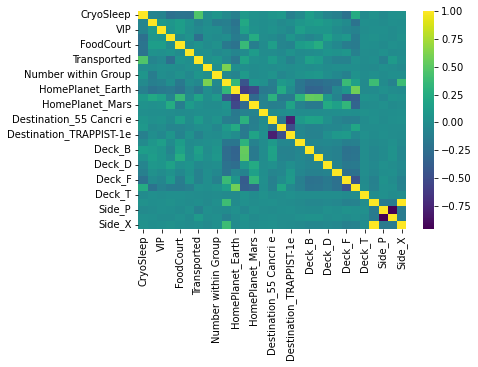

In [46]:
sns.heatmap(train.corr(),cmap='viridis')

In [47]:
l = list(train.select_dtypes(include = 'float64'))
l

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall']

In [48]:
for i in l:
    train[i] = train[i].astype('int64')
    X_test[i] = X_test[i].astype('int64')

In [49]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   CryoSleep                  8693 non-null   int64
 1   Age                        8693 non-null   int64
 2   VIP                        8693 non-null   int64
 3   RoomService                8693 non-null   int64
 4   FoodCourt                  8693 non-null   int64
 5   ShoppingMall               8693 non-null   int64
 6   Transported                8693 non-null   int64
 7   Group of Passenger         8693 non-null   int64
 8   Number within Group        8693 non-null   int64
 9   Number                     8693 non-null   int64
 10  HomePlanet_Earth           8693 non-null   uint8
 11  HomePlanet_Europa          8693 non-null   uint8
 12  HomePlanet_Mars            8693 non-null   uint8
 13  HomePlanet_Undefined       8693 non-null   uint8
 14  Destination_55 Cancri e 

### Model

In [50]:
X_train = train.drop(['Transported'], axis=1)
y_train = train['Transported']

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [52]:
scaled_X_train = scaler.fit_transform(X_train)

X_train = pd.DataFrame(scaled_X_train,columns=X_train.columns)

In [53]:
scaled_X_test = scaler.transform(X_test)
X_test = pd.DataFrame(scaled_X_test,columns=X_test.columns)
X_test.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Group of Passenger,Number within Group,Number,HomePlanet_Earth,...,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_X,Side_P,Side_S,Side_X
0,1.364685,-0.127733,-0.153063,-0.333105,-0.281027,-0.283579,-1.729916,-0.491161,-1.149523,0.942847,...,-0.306610,-0.241218,-0.334759,-0.688215,1.548235,-0.02399,-0.153063,-0.968181,1.013551,-0.153063
1,-0.732770,-0.685682,-0.153063,-0.333105,-0.275387,-0.283579,-1.728044,-0.491161,-1.147697,0.942847,...,-0.306610,-0.241218,-0.334759,1.453035,-0.645897,-0.02399,-0.153063,-0.968181,1.013551,-0.153063
2,1.364685,0.151241,-0.153063,-0.333105,-0.281027,-0.283579,-1.727669,-0.491161,-1.155002,-1.060617,...,3.261474,-0.241218,-0.334759,-0.688215,-0.645897,-0.02399,-0.153063,-0.968181,1.013551,-0.153063
3,-0.732770,0.639445,-0.153063,-0.333105,3.887680,-0.283579,-1.726921,-0.491161,-1.153176,-1.060617,...,3.261474,-0.241218,-0.334759,-0.688215,-0.645897,-0.02399,-0.153063,-0.968181,1.013551,-0.153063
4,-0.732770,-0.615938,-0.153063,-0.317964,-0.281027,0.778343,-1.726172,-0.491161,-1.145871,0.942847,...,-0.306610,-0.241218,-0.334759,1.453035,-0.645897,-0.02399,-0.153063,-0.968181,1.013551,-0.153063


## Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
SVM_clf = SVC()
SVM_clf.fit(X_train, y_train)
prediction = SVM_clf.predict(X_test)

In [55]:
prediction

array([1, 0, 1, ..., 1, 0, 1], dtype=int64)

In [56]:
prediction = pd.DataFrame(prediction, columns = ['Transported'])

In [57]:
df = pd.read_csv("test.csv", usecols = [0])
df = pd.concat([df, prediction],axis = 1)
df['Transported'].replace({1: True, 0:False}, inplace = True)
df

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,False


In [58]:
df.to_csv('submission.csv', index=False)

### Result: Accuracy is equal to 0.77063